In [1]:
import torch
import numpy as np

In [2]:
graph = torch.load('ethereum_graph_combine_normalized_pca_4_twitter_features.pt')

In [4]:
graph

Data(x=[1709575, 12], edge_index=[2, 13170869])

In [88]:
import pandas as pd
import torch

x = graph.x
edge_index = graph.edge_index

nodes_df = pd.DataFrame(
    (b.sum(dim=-1).type(torch.float32)[0] == b.sum(dim=-1).type(torch.float32)).cpu().numpy(), 
    columns=[f"feature_{i}" for i in range(1)]
)
nodes_df.insert(0, 'id', nodes_df.index) 
nodes_df.to_csv("nodes.csv", index=False)

In [4]:
edges = edge_index.t().cpu().numpy()  
edges_df = pd.DataFrame(edges, columns=["source", "target"])

edges_df.to_csv("edges.csv", index=False)

In [62]:
b = graph.x[:, 8:]

In [77]:
b.sum(dim=-1).type(torch.float32)[0] == b.sum(dim=-1).type(torch.float32)

tensor([True, True, True,  ..., True, True, True])

In [69]:
(b.sum(dim=-1) == -0.9405)

tensor([False, False, False,  ..., False, False, False])

In [79]:
(b.sum(dim=-1).type(torch.float32)[0] == b.sum(dim=-1).type(torch.float32)).sum()

tensor(1685433)

In [87]:
s_[329]

tensor(-0.9405)

In [84]:
null = []
# item = b.sum(dim=-1).type(torch.float32)[0]
s_ = b.sum(dim=-1).type(torch.float32)
item = s_[0]
for i in range(len(s_)):
    if s_[i] != item:
        null.append(i)

In [5]:
from torch_geometric.utils import to_networkx

In [6]:
G = to_networkx(
    graph,
    node_attrs=['x'],  # Include node features (optional)
    to_undirected=True  # Set False if directed
)

In [7]:
G

In [8]:
len(G)

1709575

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
import igraph as ig

In [9]:
edge_index = graph.edge_index 
edges = edge_index.t().cpu().numpy().tolist()

g = ig.Graph()
g.add_vertices(1709575) 
g.add_edges(edges)

In [54]:
g = g.clusters().giant()

radius = g.radius()
diameter = g.diameter()

# global_clustering = g.transitivity_undirected()

# avg_clustering = sum(g.transitivity_local_undirected(mode="zero")) / g.vcount()

# avg_path_length = g.average_path_length()

print(f"Radius of Giant Component: {radius}")
print(f"Diameter of Giant Component: {diameter}")
# print(f"Global Clustering Coefficient: {global_clustering:.3f}")
# print(f"Average Clustering Coefficient: {avg_clustering:.3f}")
# print(f"Average Path Length: {avg_path_length:.3f}")

/var/folders/yc/bvh36w157535p8tyfgks79lm0000gn/T/ipykernel_36934/2305550429.py:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  g = g.clusters().giant()


KeyboardInterrupt: 

In [55]:
global_clustering = g.transitivity_undirected()

avg_clustering = sum(g.transitivity_local_undirected(mode="zero")) / g.vcount()

# avg_path_length = g.average_path_length()

print(f"Global Clustering Coefficient: {global_clustering:.3f}")
print(f"Average Clustering Coefficient: {avg_clustering:.3f}")
print(f"Average Path Length: {avg_path_length:.3f}")

Global Clustering Coefficient: 0.005
Average Clustering Coefficient: 0.045


NameError: name 'avg_path_length' is not defined

In [9]:
print("=== Базовые метрики ===")
print(f"Количество узлов: {g.vcount()}")
print(f"Количество ребер: {g.ecount()}")
print(f"Средняя степень: {2 * g.ecount() / g.vcount():.2f}")
print(f"Плотность графа: {g.density():.4f}")
print(f"Связный ли граф? {'Да' if g.is_connected() else 'Нет'}")

=== Базовые метрики ===
Количество узлов: 1709575
Количество ребер: 13170869
Средняя степень: 15.41
Плотность графа: 0.0000
Связный ли граф? Да


In [33]:
np.random.seed(42)
sample_nodes = np.random.choice(g.vcount(), size=1000, replace=False)
print("\n=== Центральности (для подвыборки 1000 узлов) ===")
degree_centrality = g.degree(sample_nodes)
betweenness = g.betweenness(sample_nodes)
print(f"Макс. степень: {max(degree_centrality)}")
print(f"Макс. посредничество: {max(betweenness)}")


=== Центральности (для подвыборки 1000 узлов) ===


KeyboardInterrupt: 

In [37]:
# g.personalized_pagerank(damping=0.85, reset=reset_vector)
r = g.personalized_pagerank()

In [47]:
rl = []
for i in range(len(r)):
    rl.append([r[i], i])

In [48]:
rl[0]

[5.650334334239245e-07, 0]

In [49]:
b = sorted(rl)

In [52]:
b[::-1][:10]

[[0.002934135441666441, 3744],
 [0.001687005246756345, 329],
 [0.0007393414068822501, 954354],
 [0.000660156138341521, 1282392],
 [0.0005204459419189206, 899501],
 [0.0005053777595129633, 2981],
 [0.00043987306370922097, 4759],
 [0.0004039515199121642, 36448],
 [0.00039885611093551555, 2900],
 [0.0003160943098554686, 4035]]

In [17]:
print("\n=== Сообщества ===")
communities = g.community_multilevel()
print(f"Найдено сообществ: {len(communities)}")


=== Сообщества ===
Найдено сообществ: 69552


In [19]:
g.write_graphml("large_graph.graphml")

In [18]:
community_graph = communities.cluster_graph()

ig.plot(community_graph, 
        vertex_label_size=10, 
        vertex_size=20,
        edge_curved=False,
        target="community_graph.png")

KeyboardInterrupt: 

In [27]:
degrees = g.degree()
d = []
for i in range(len(degrees)):
    if degrees[i] < 150:
        d.append(degrees[i])

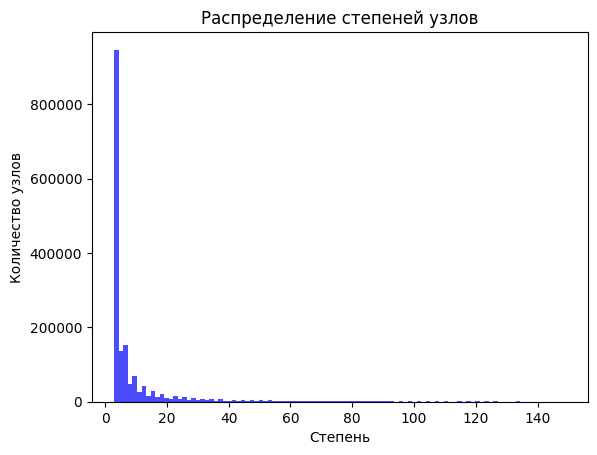

In [28]:
# degrees = g.degree()
plt.hist(d, bins=100, alpha=0.7, color='blue')
plt.title("Распределение степеней узлов")
plt.xlabel("Степень")
plt.ylabel("Количество узлов")
plt.show()

In [16]:
if g.vcount() < 500:
    ig.plot(g, target="graph.png", vertex_size=10)
else:
    ego = g.neighborhood(vertices=0, order=3)
    subgraph = g.induced_subgraph(ego)
    ig.plot(subgraph, target="ego_network.png", vertex_size=15)


Визуализация всего графа невозможна - используйте подграфы:


In [11]:
print("=== Базовые метрики ===")
print(f"Количество узлов: {g.vcount()}")
print(f"Количество ребер: {g.ecount()}")
print(f"Средняя степень: {2 * g.ecount() / g.vcount():.2f}")
print(f"Плотность графа: {g.density():.4f}")
print(f"Связный ли граф? {'Да' if g.is_connected() else 'Нет'}")

sample_nodes = np.random.choice(g.vcount(), size=1000, replace=False)
print("\n=== Центральности (для подвыборки 1000 узлов) ===")
degree_centrality = g.degree(sample_nodes)
# betweenness = g.betweenness(sample_nodes)
print(f"Макс. степень: {max(degree_centrality)}")
# print(f"Макс. посредничество: {max(betweenness)}")

print("\n=== Сообщества ===")
communities = g.community_multilevel()
print(f"Найдено сообществ: {len(communities)}")

degrees = g.degree()
plt.hist(degrees, bins=50, alpha=0.7, color='blue')
plt.title("Распределение степеней узлов")
plt.xlabel("Степень")
plt.ylabel("Количество узлов")
plt.show()

if g.vcount() < 500:
    ig.plot(g, target="graph.png", vertex_size=10)
else:
    ego = g.neighborhood(vertices=0, order=2)
    subgraph = g.induced_subgraph(ego)
    ig.plot(subgraph, target="ego_network.png", vertex_size=15)

=== Базовые метрики ===
Количество узлов: 1709575
Количество ребер: 13170869
Средняя степень: 15.41
Плотность графа: 0.0000
Связный ли граф? Да

=== Центральности (для подвыборки 1000 узлов) ===
Макс. степень: 2294

=== Сообщества ===


KeyboardInterrupt: 

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

Exception ignored in: <function _xla_gc_callback at 0x149994a60>
Traceback (most recent call last):
  File "/Users/maximnikitin/Documents/miniconda3/envs/dl/lib/python3.10/site-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
nx.draw(G, with_labels=True, node_color='lightblue')
plt.show()